# 💵 Income Inequality prediction

## <span style="font-family:cursive;text-align:center">⬇️ Import Libraries</span>

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

## <span style="font-family:cursive;text-align:center">⬇️ Import Data</span>

In [73]:
df = pd.read_csv(r"C:\Users\suren\IIP_Project\Dataset\data.csv")

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Use head, tail and sample to see various records in df </b><br>

</div>

In [74]:
df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [75]:
df.tail()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
209494,ID_TZ99995,16,Female,7th and 8th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,Canada,?,?,?,?,NaN,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,NaN,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3530.26,Below limit
209498,ID_TZ99999,19,Male,11th grade,Local government,High school,Never married,Black,All other,Children or Armed Forces,...,US,MSA to MSA,Same,Same county,Same county,No,South,Florida,1987.72,Below limit


In [76]:
df.sample(5)

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
161573,ID_TZ56430,71,Female,9th grade,Private,NaN,Widowed,White,All other,PT for non-econ reasons usually FT,...,US,?,?,?,?,NaN,NaN,NaN,2575.70,Below limit
204940,ID_TZ95855,62,Male,Some college but no degree,Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,?,?,?,?,NaN,NaN,NaN,1032.11,Below limit
94538,ID_TZ184268,19,Male,High school graduate,Private,College or university,Never married,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1490.83,Below limit
76588,ID_TZ168097,65,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1952.93,Below limit
159402,ID_TZ54457,32,Female,Masters degree(MA MS MEng MEd MSW MBA),NaN,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3480.35,Below limit


# <span style="font-family:cursive;text-align:center">📊 Exploratory Data Analysis</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>To check shape of the dataframe use .shape() function which return (rows,columns)</b><br>
    📌 &nbsp;<b>To see the name of columns use .columns function which returns name of columns as a list</b><br>
</div>

In [77]:
df.shape

(209499, 43)

In [78]:
df.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b> .info() prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.</b><br>
    📌 &nbsp;<b>.describe(): Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.</b><br>
</div>

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [80]:
df.describe()

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
count,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000
mean,34.518728,0.176760,55.433487,23.158850,15.332398,11.321734,1.956067,1.515854,435.926887,36.881737,194.533420,94.499745,1740.888324
std,22.306738,0.555562,276.757327,24.397963,18.049655,14.460839,2.365154,0.850853,4696.359500,270.383302,1956.375501,0.500001,995.559557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,37.870000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1061.290000
50%,33.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1617.040000
75%,50.000000,0.000000,0.000000,52.000000,33.000000,26.000000,4.000000,2.000000,0.000000,0.000000,0.000000,95.000000,2185.480000
max,90.000000,2.000000,9999.000000,52.000000,51.000000,46.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000,95.000000,18656.300000


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b> Droping the ID column because it have unique values.</b><br>

In [81]:
df = df.drop("ID", axis=1) 
df.describe(include=['O']).T # to include categorical columns

,count,unique,top,freq
gender,209499,2,Female,108784
education,209499,17,High school graduate,50627
class,104254,8,Private,75617
education_institute,13302,2,High school,7247
marital_status,209499,7,Never married,90723
race,209499,5,White,175709
is_hispanic,209499,10,All other,180404
employment_commitment,209499,8,Children or Armed Forces,129789
unemployment_reason,6520,5,Other job loser,2242
is_labor_union,20079,2,No,16968


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>.isna(): Detect missing values.</b><br>
</div>

In [82]:
df.isna().sum().sort_values(ascending=False)

veterans_admin_questionnaire      207415
unemployment_reason               202979
education_institute               196197
old_residence_reg                 193148
old_residence_state               193148
is_labor_union                    189420
under_18_family                   151654
residence_1_year_ago              106284
occupation_code_main              105694
class                             105245
migration_prev_sunbelt             88452
migration_code_move_within_reg      1588
migration_code_change_in_msa        1588
migration_code_change_in_reg        1588
citizenship                            0
importance_of_record                   0
losses                                 0
stocks_status                          0
country_of_birth_father                0
mig_year                               0
country_of_birth_own                   0
country_of_birth_mother                0
tax_status                             0
gains                                  0
age             

In [83]:
round((df.isna().sum().sort_values(ascending=False) / df.shape[0]) * 100, 2).astype(str) + "%"

veterans_admin_questionnaire      99.01%
unemployment_reason               96.89%
education_institute               93.65%
old_residence_reg                  92.2%
old_residence_state                92.2%
is_labor_union                    90.42%
under_18_family                   72.39%
residence_1_year_ago              50.73%
occupation_code_main              50.45%
class                             50.24%
migration_prev_sunbelt            42.22%
migration_code_move_within_reg     0.76%
migration_code_change_in_msa       0.76%
migration_code_change_in_reg       0.76%
citizenship                         0.0%
importance_of_record                0.0%
losses                              0.0%
stocks_status                       0.0%
country_of_birth_father             0.0%
mig_year                            0.0%
country_of_birth_own                0.0%
country_of_birth_mother             0.0%
tax_status                          0.0%
gains                               0.0%
age             

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>.duplicated(): Detect duplicate values.</b><br>
</div>

In [84]:
df.duplicated().sum()

3573

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>.unique(): returns unique values.</b><br>
    📌 &nbsp;<b>.nunique(): returns the count of unique values.</b><br>
</div>

In [85]:
print("Unique values per column:")
df.nunique()

Unique values per column:


age                                   91
gender                                 2
education                             17
class                                  8
education_institute                    2
marital_status                         7
race                                   5
is_hispanic                           10
employment_commitment                  8
unemployment_reason                    5
employment_stat                        3
wage_per_hour                       1232
is_labor_union                         2
working_week_per_year                 53
industry_code                         52
industry_code_main                    24
occupation_code                       47
occupation_code_main                  14
total_employed                         7
household_stat                        38
household_summary                      8
under_18_family                        4
veterans_admin_questionnaire           2
vet_benefit                            3
tax_status      

In [86]:
for column in df.columns:
    print(f"Unique values in {column}:")
    print(df[column].unique(), "\n")

Unique values in age:
[79 65 21  2 70 45 53 22 73 30  4 16 43 36  5 88 40 47 59 69 50 27 39 85
 29 41 14 33 67 52 11  9 13 19 26 23 37 58 63 46 62 28 31  3 18 78 15 38
  7 35  1 20  0 48 24 56 25  8 66 71 32 75 51 10 44 42 55 74 77 34 80 17
 83 86 12 68 60 57 64 72 90 61 82  6 84 49 76 54 89 81 87] 

Unique values in gender:
[' Female' ' Male'] 

Unique values in education:
[' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)'] 

Unique values in class:
[nan ' Federal government' ' Private' ' Local government'
 ' Self-employed-incorporated' ' Self-employed-not incorporated'
 ' State government' 

['US' ' India' ' ?' ' Peru' ' Germany' ' El-Salvador' ' Mexico'
 ' Puerto-Rico' ' Philippines' ' Canada' ' France' ' Cambodia' ' Italy'
 ' Ecuador' ' China' ' Hungary' ' Dominican-Republic' ' Japan' ' England'
 ' Cuba' ' Poland' ' South Korea' ' Yugoslavia' ' Scotland' ' Nicaragua'
 ' Guatemala' ' Holand-Netherlands' ' Greece' ' Ireland' ' Honduras'
 ' Haiti' ' Outlying-U S (Guam USVI etc)' ' Trinadad&Tobago' ' Thailand'
 ' Jamaica' ' Iran' ' Vietnam' ' Columbia' ' Portugal' ' Laos' ' Taiwan'
 ' Hong Kong' ' Panama'] 

Unique values in migration_code_change_in_msa:
[' ?' 'unchanged' ' MSA to MSA' nan ' NonMSA to nonMSA' ' MSA to nonMSA'
 ' Not identifiable' ' NonMSA to MSA' ' Abroad to MSA' ' Abroad to nonMSA'] 

Unique values in migration_prev_sunbelt:
[' ?' nan ' No' 'Same'] 

Unique values in migration_code_move_within_reg:
[' ?' 'unchanged' ' Same county' ' Different state in South'
 ' Different county same state' nan ' Different state in West'
 ' Different state in Northeast' ' Ab

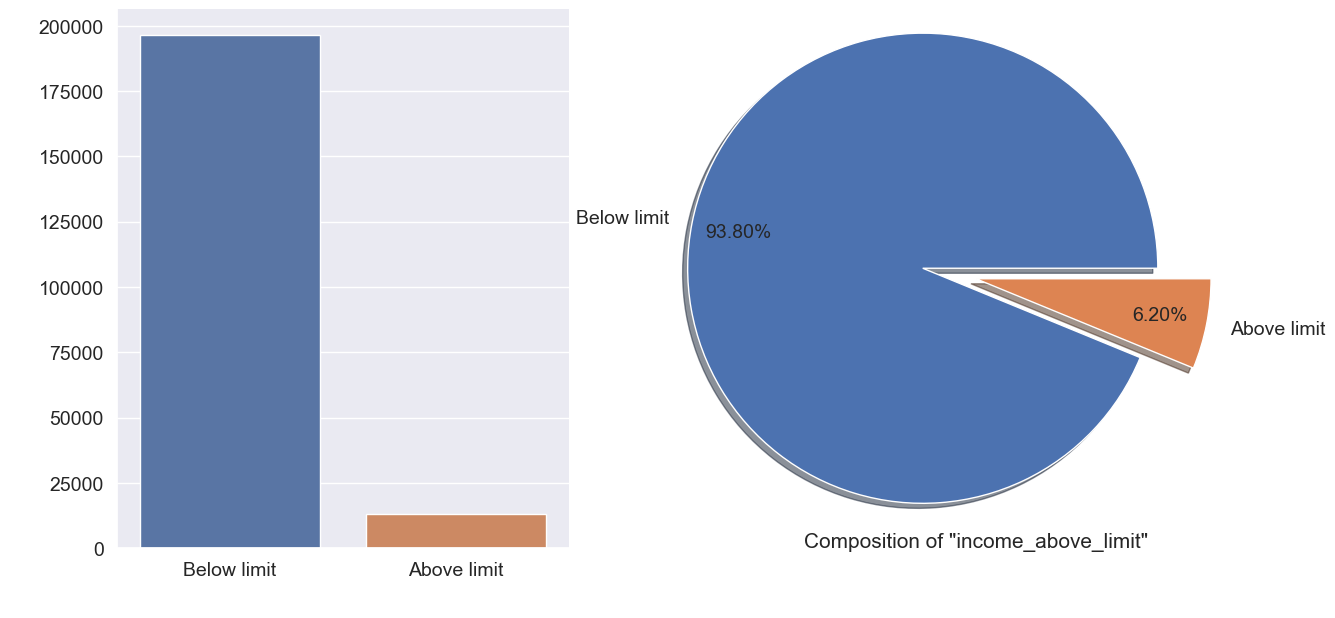

In [87]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["income_above_limit"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(df["income_above_limit"].value_counts(),
        labels=list(df["income_above_limit"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14},
        explode=[0.3, 0]
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "income_above_limit"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* The dataset is unbalanced, as the dependent feature 'income_above_limit' contains 93.80% values have income less than limit and 6.20% values have income more than limit
* So many null values are also present which is not great
* We need to balanced the dataset

Target looks like classification
Linear Discriminant Analysis training set score: 0.548
Showing only top 10 of 30 categorical features


[<AxesSubplot: title={'center': 'Target distribution'}, xlabel='count', ylabel='income_above_limit'>,
 [<Figure size 1600x400 with 8 Axes>,
  array([[<AxesSubplot: title={'center': '0.561'}, xlabel='working_week_per_...(jittered)', ylabel='stocks_status(jittered)'>,
          <AxesSubplot: title={'center': '0.550'}, xlabel='stocks_status(jittered)', ylabel='occupation_code(jittered)'>,
          <AxesSubplot: title={'center': '0.543'}, xlabel='industry_code(jittered)', ylabel='occupation_code(jittered)'>,
          <AxesSubplot: title={'center': '0.539'}, xlabel='total_employed(jittered)', ylabel='stocks_status(jittered)'>]],
        dtype=object),
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 640x480 with 1 Axes>],
 array([[<AxesSubplot: title={'center': 'education'}>,
         <AxesSubplot: title={'center': 'occupation_code_main'}>,
         <AxesSubplot: title={'center': 'industry_code_main'}>,
         <AxesSubplot: title={'center': 'household_stat'}>,
         <AxesSubplot:

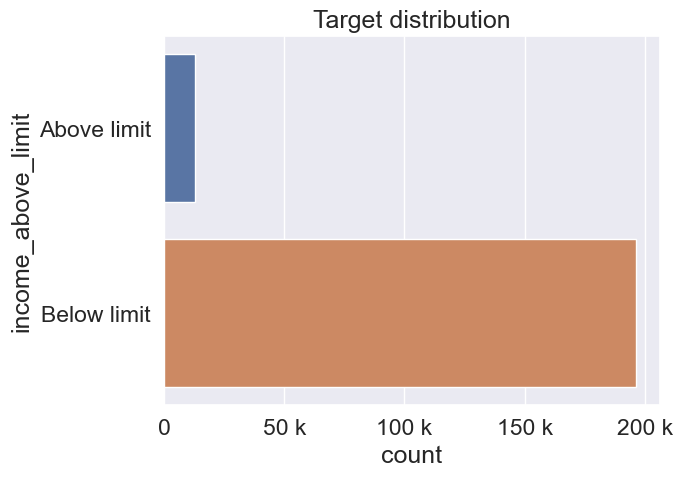

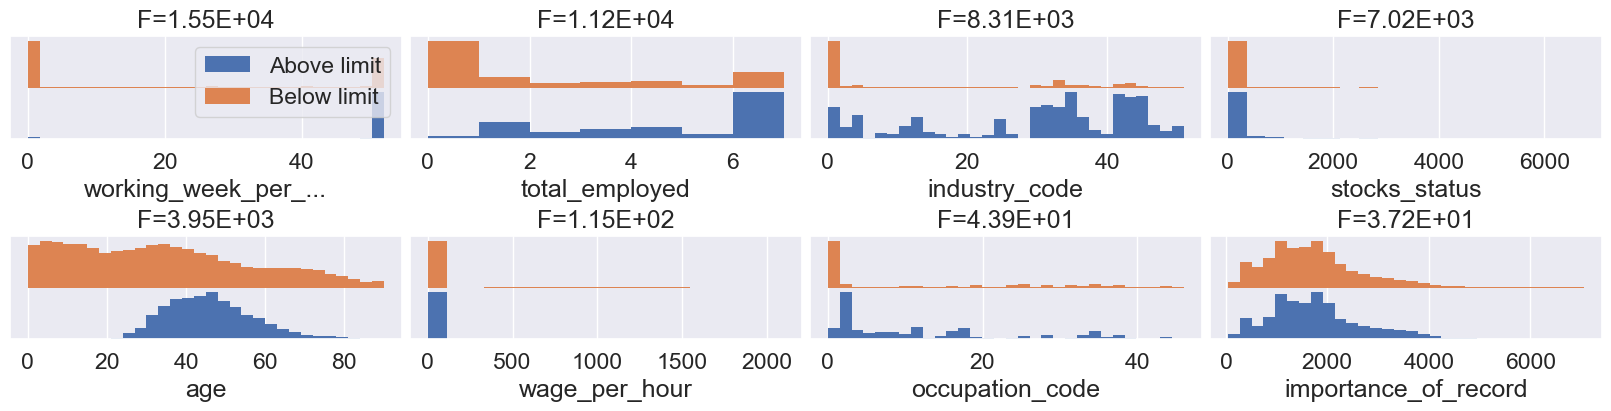

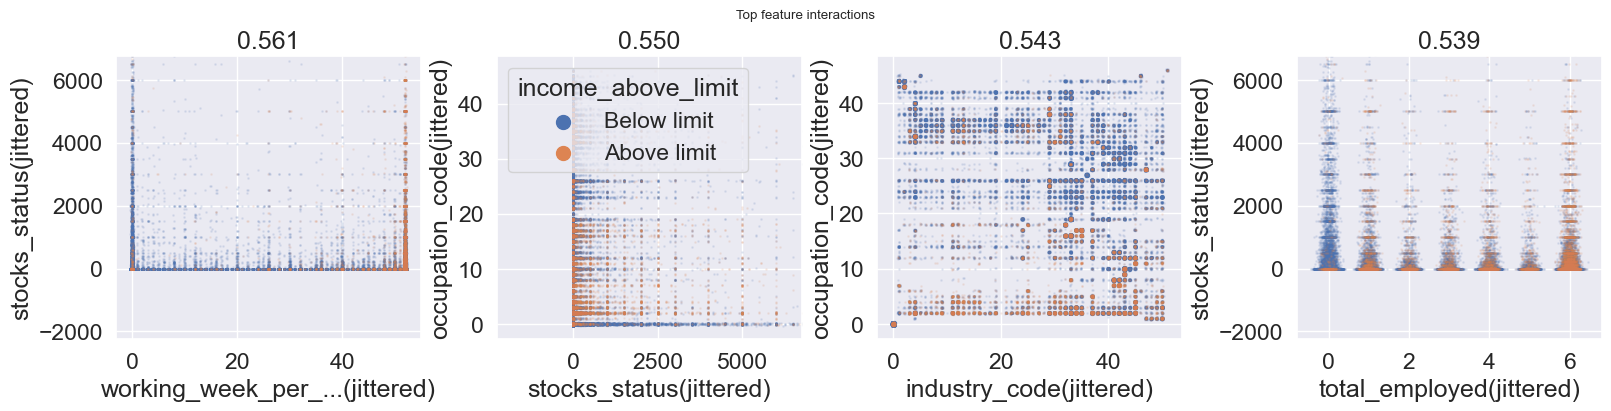

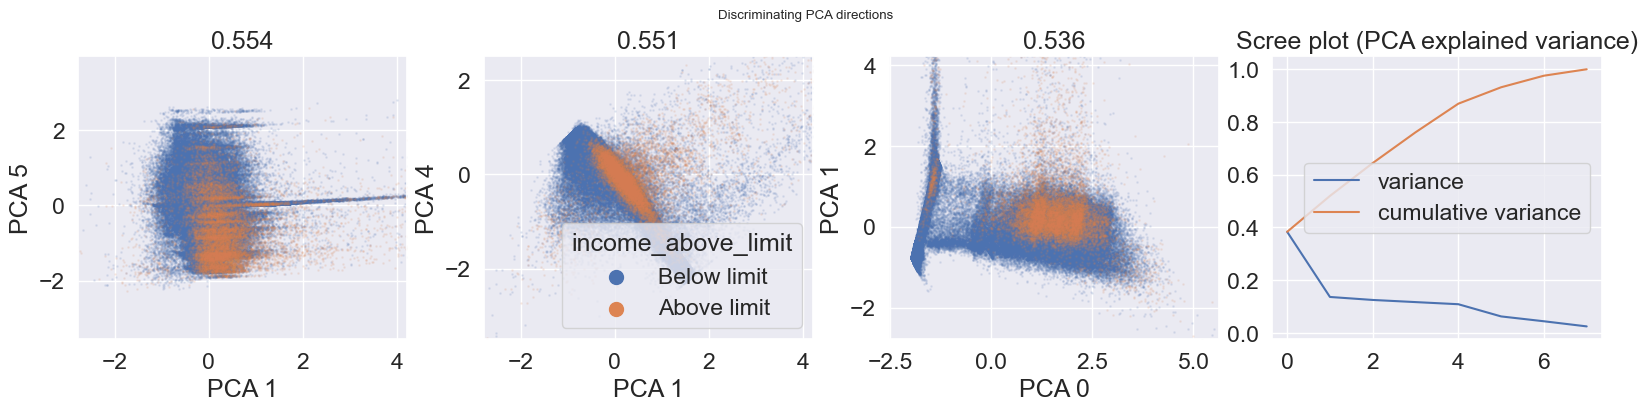

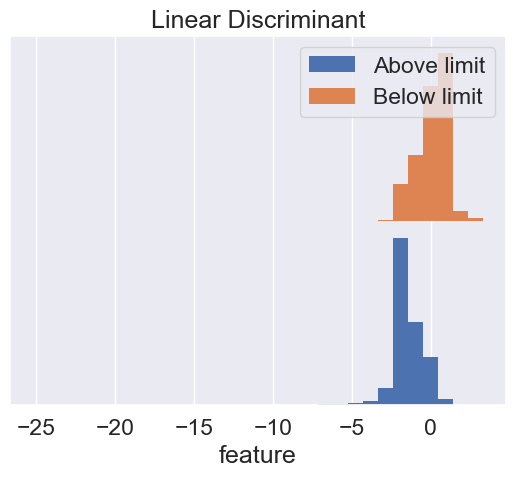

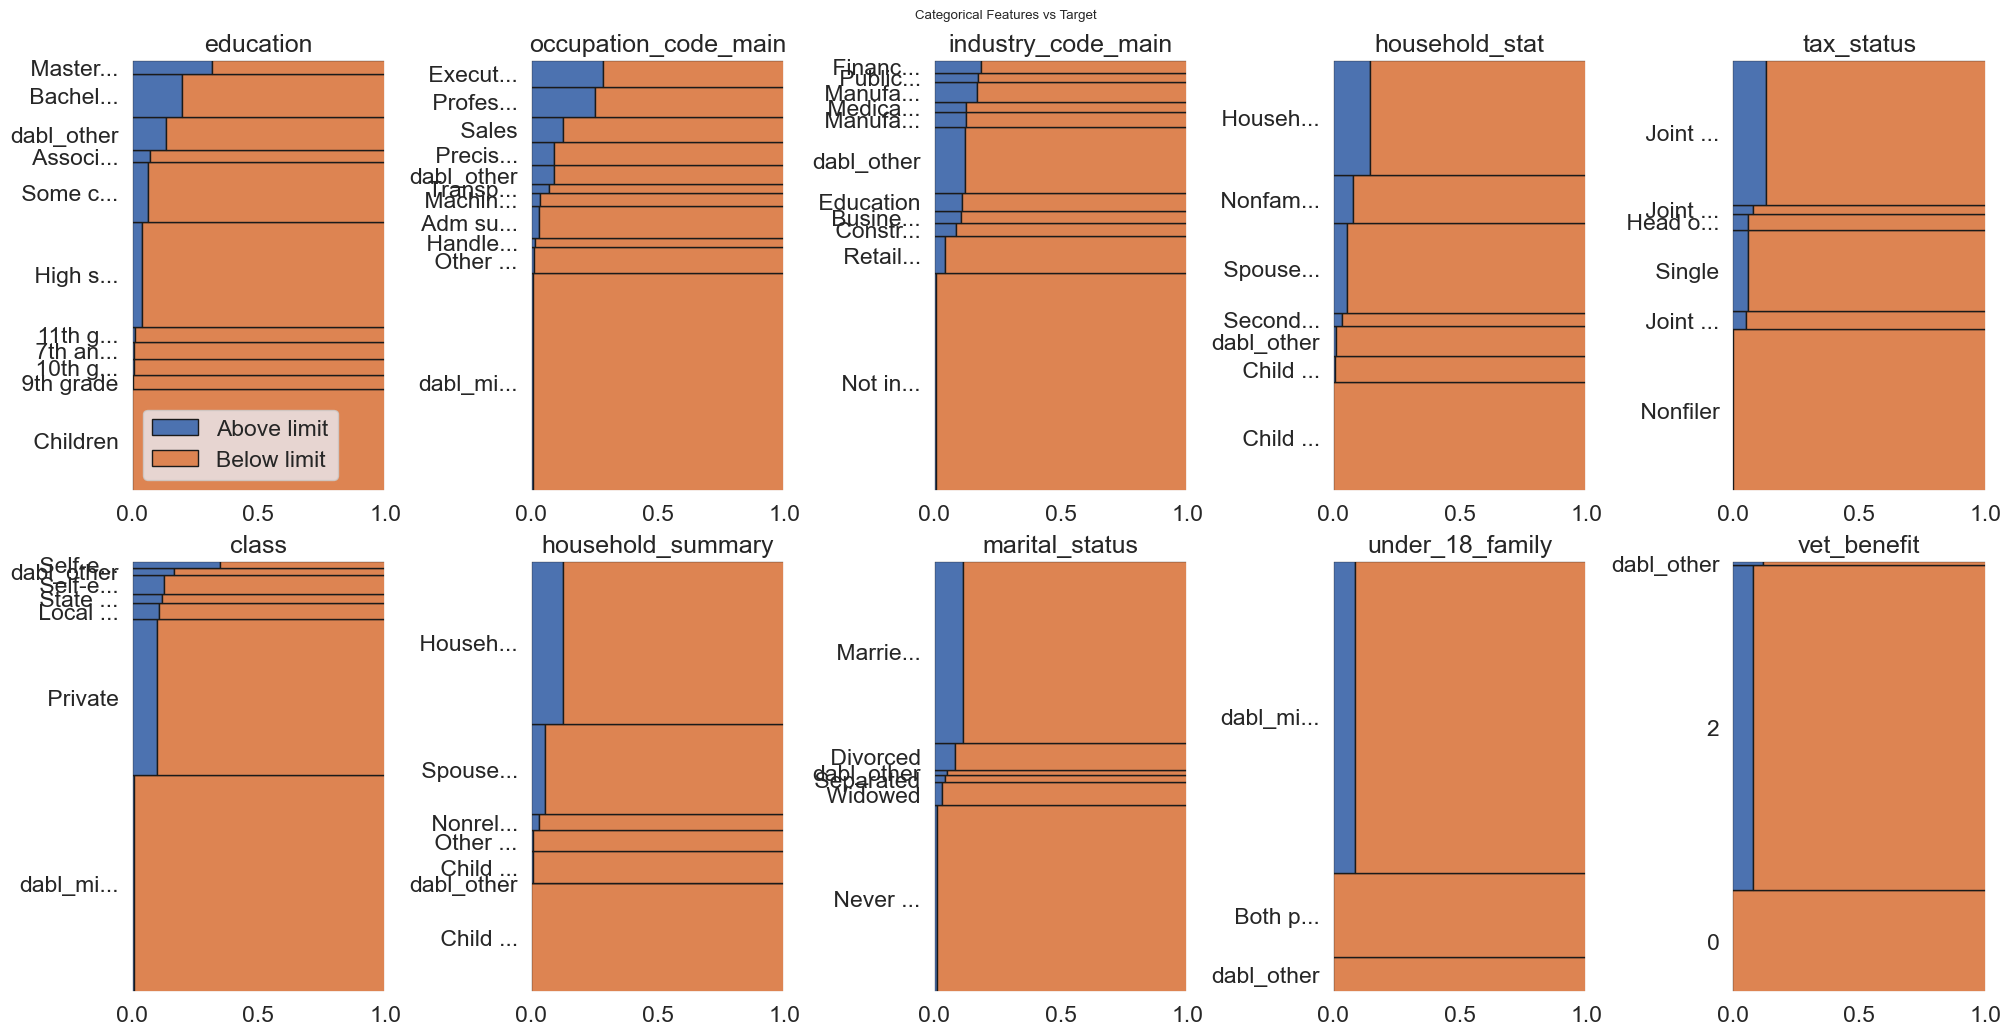

In [88]:
# Visualizing dataset using dabl library

import dabl
dabl.plot(df, target_col='income_above_limit')

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<font color='#0080FF'>Does Gender have impact on income?</font>

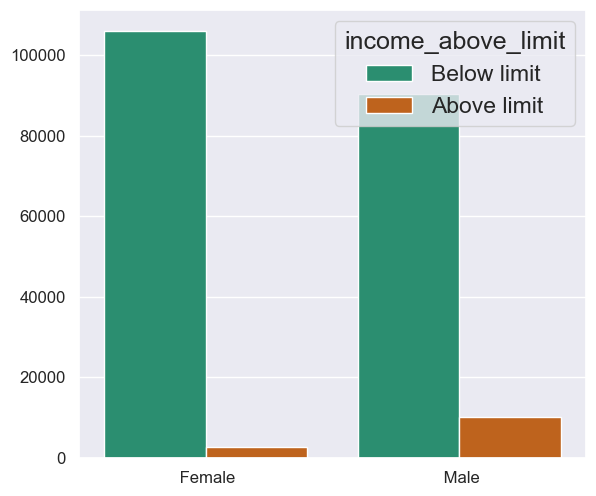

In [89]:
plt.figure(figsize=(6,5))
sns.countplot(x='gender', hue='income_above_limit', data=df, palette='Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title(col, fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [90]:
print('Males with income below limit:',len(df.loc[(df['gender']==' Male') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['gender']==' Male')]) * 100, '%')
print('Females with income below limit:',len(df.loc[(df['gender']!=' Male') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['gender']!=' Male')]) * 100, '%')
print("----------------------------------------------")
print('Males with income above limit:',len(df.loc[(df['gender']==' Male') & (df['income_above_limit']=='Above limit')])/len(df.loc[(df['gender']==' Male')]) * 100, '%')
print('Females with income above limit:',len(df.loc[(df['gender']!=' Male') & (df['income_above_limit']=='Above limit')])/len(df.loc[(df['gender']!=' Male')]) * 100, '%')

Males with income below limit: 89.86248324479969 %
Females with income below limit: 97.43712310633916 %
----------------------------------------------
Males with income above limit: 10.137516755200318 %
Females with income above limit: 2.5628768936608326 %


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Males and Females with income below limit is 89.8% and 97.4%
* Males and Females with income above limit is 10.1% and 2.5%

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<font color='#0080FF'>Does Education have impact on income?</font>

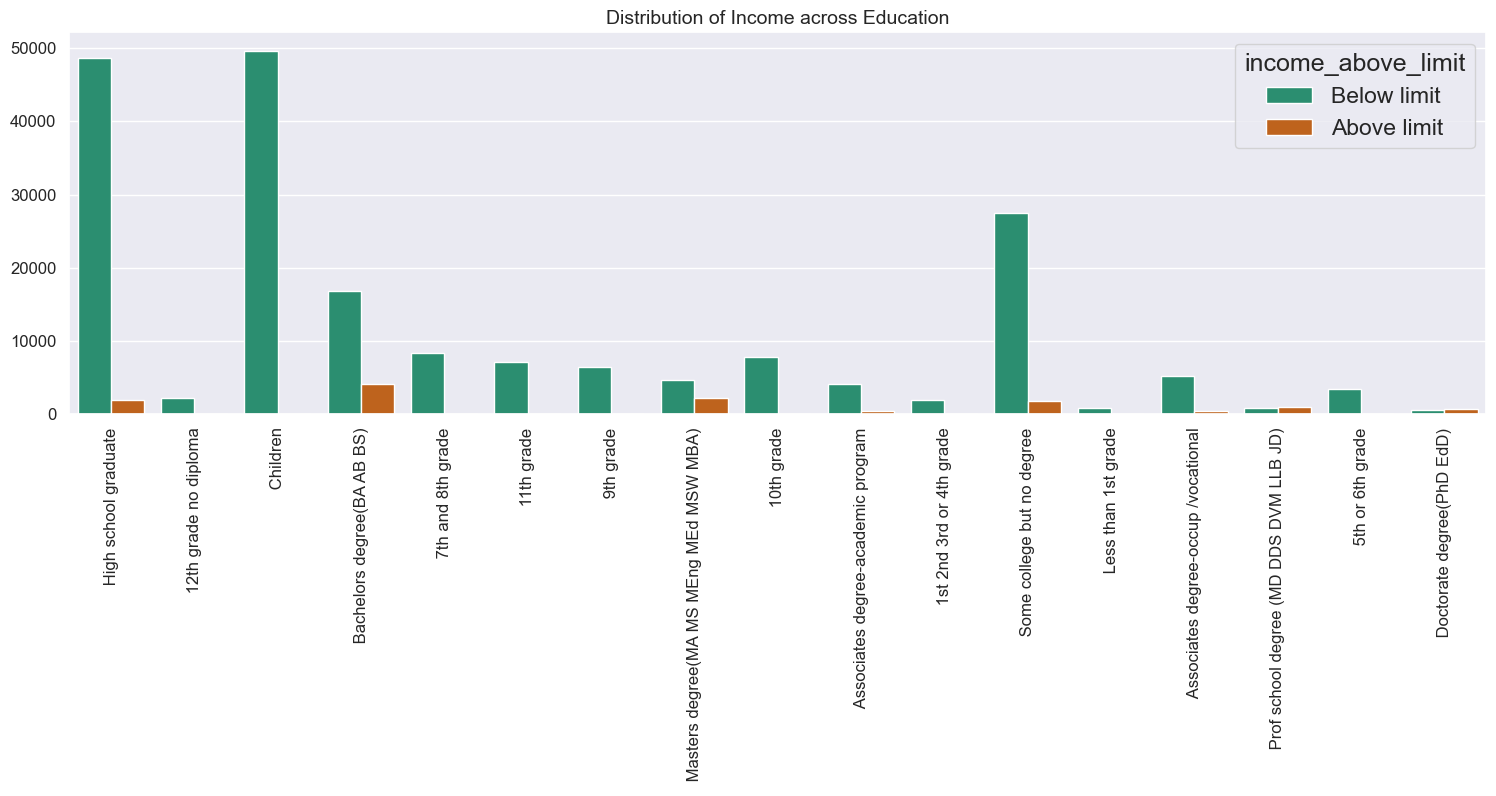

In [91]:
plt.figure(figsize=(15,8))
sns.countplot(x='education', hue='income_above_limit', data=df, palette='Dark2')
plt.xticks(fontsize=12)
plt.xticks(rotation=90)
plt.yticks(fontsize=12)
plt.title("Distribution of Income across Education", fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* If person have bachelors degree that income above limit is highest 


<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<font color='#0080FF'>Does marital status have impact on income?</font>

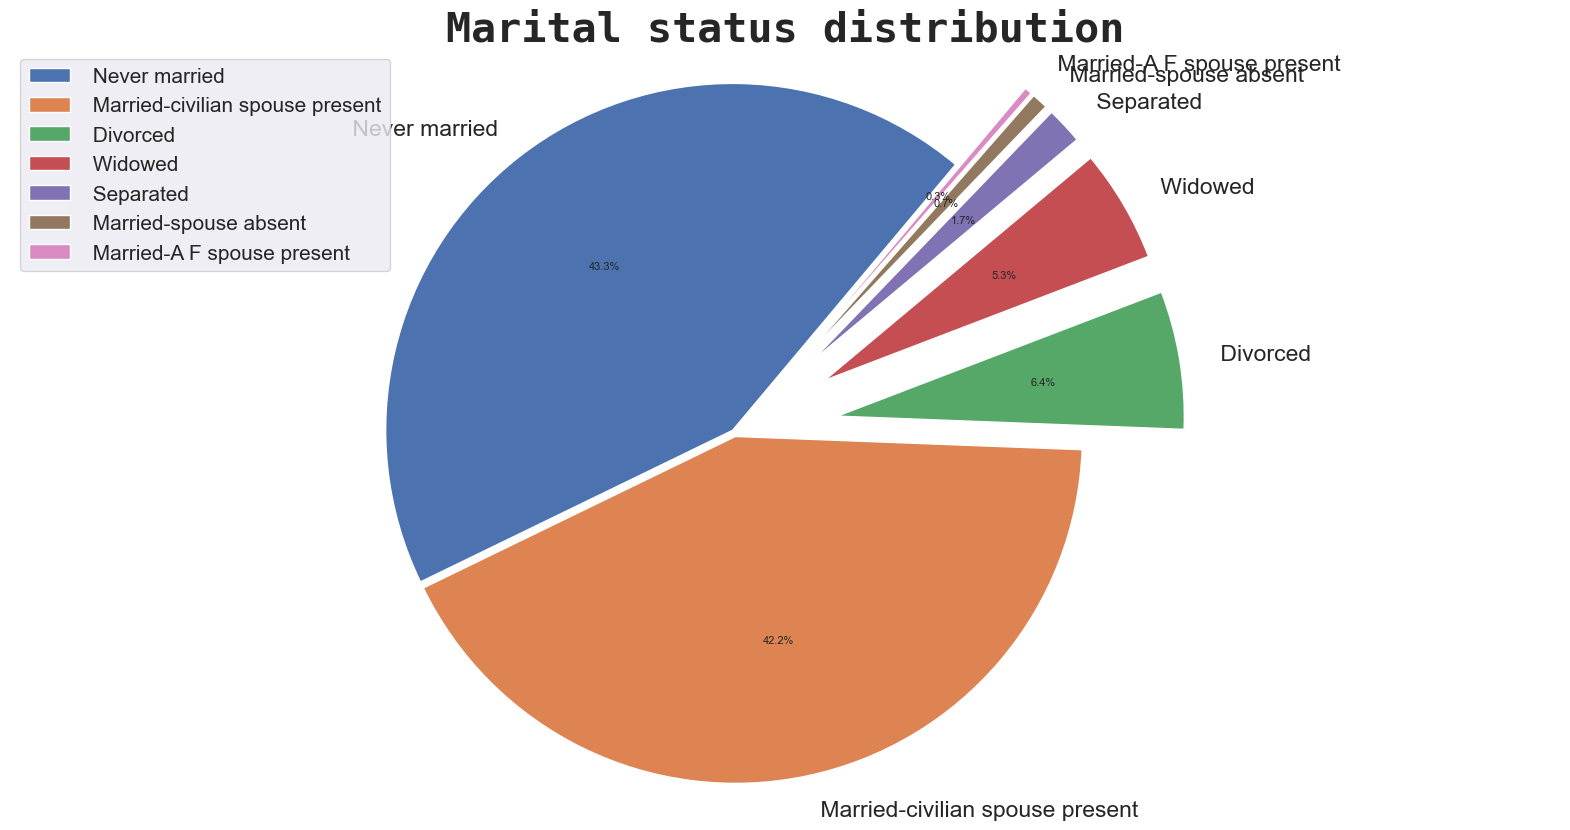

In [92]:
marital = df['marital_status'].value_counts()

plt.figure(figsize=(20, 10))
plt.pie(marital.values, labels=marital.index,
        startangle=50, autopct='%1.1f%%', explode=[0.01, 0.01, 0.3, 0.3, 0.3, 0.3, 0.3])
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
plt.title('Marital status distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15},loc='upper left')
plt.show()

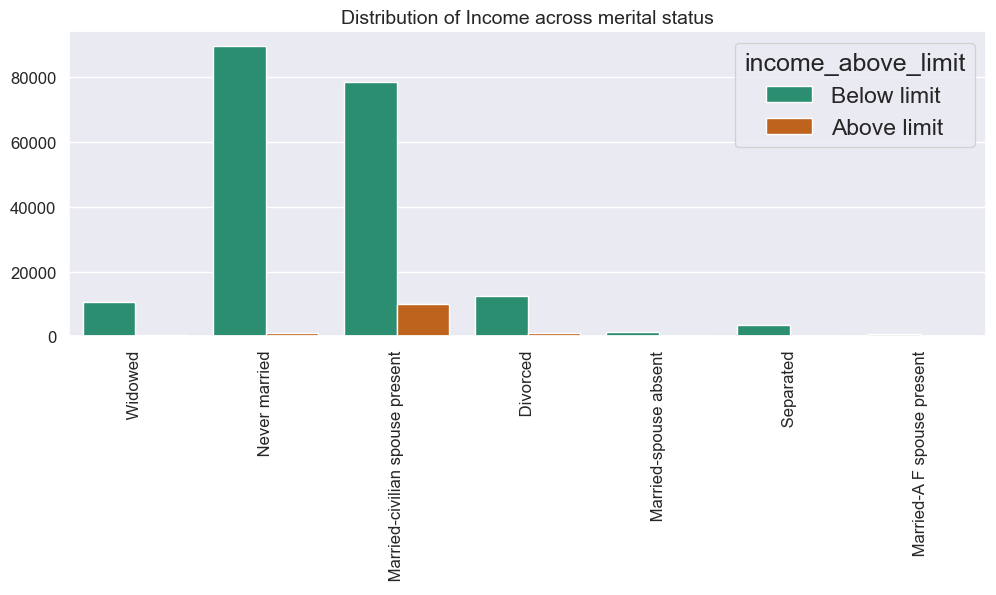

In [93]:
plt.figure(figsize=(10,6))
sns.countplot(x='marital_status', hue='income_above_limit', data=df, palette='Dark2')
plt.xticks(fontsize=12)
plt.xticks(rotation=90)
plt.yticks(fontsize=12)
plt.title("Distribution of Income across merital status", fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<font color='#0080FF'>Does race have impact on income?</font>

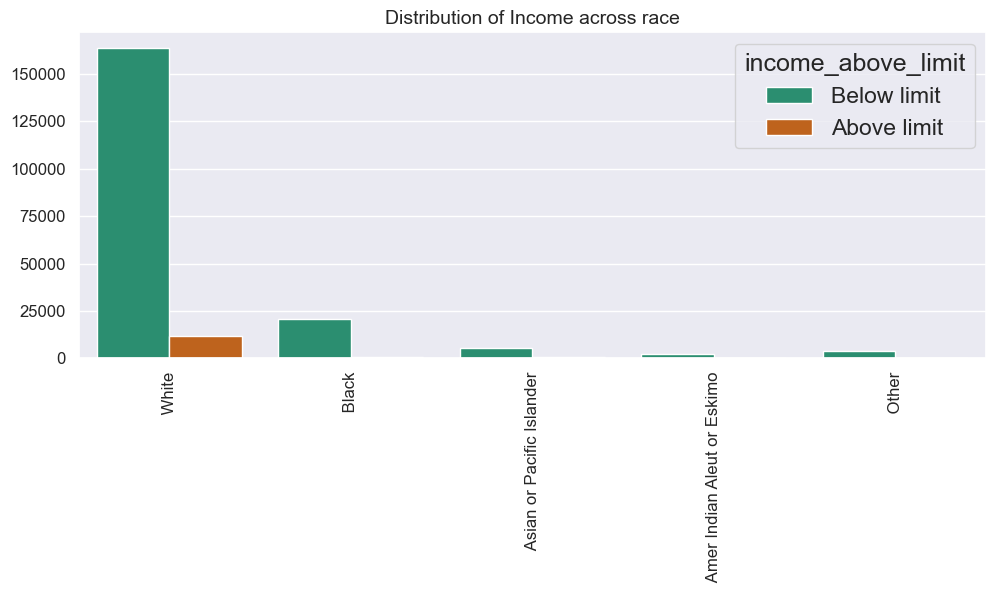

In [94]:
plt.figure(figsize=(10,6))
sns.countplot(x='race', hue='income_above_limit', data=df, palette='Dark2')
plt.xticks(fontsize=12)
plt.xticks(rotation=90)
plt.yticks(fontsize=12)
plt.title("Distribution of Income across race", fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<font color='#0080FF'>Does age have impact on income?</font>

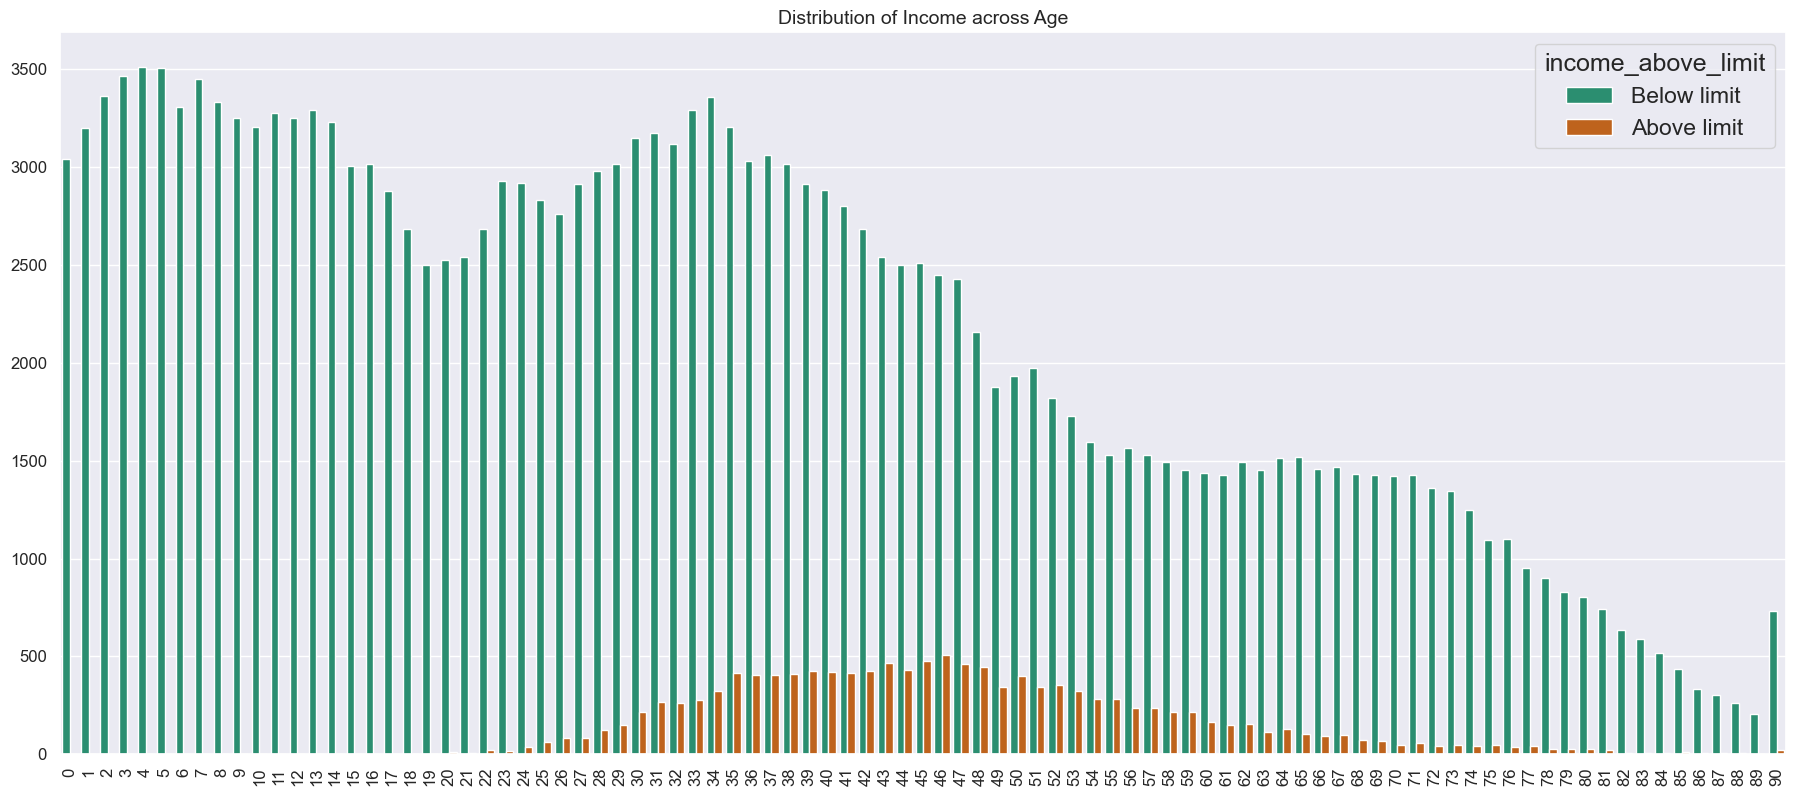

In [95]:
plt.figure(figsize=(18, 8))
sns.countplot(x='age', hue='income_above_limit', data=df, palette='Dark2')
plt.xticks(fontsize=12)
plt.xticks(rotation=90)
plt.yticks(fontsize=12)
plt.title("Distribution of Income across Age", fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* If the person age lie between 40 - 50 so most probability of income is above limit


<AxesSubplot: >

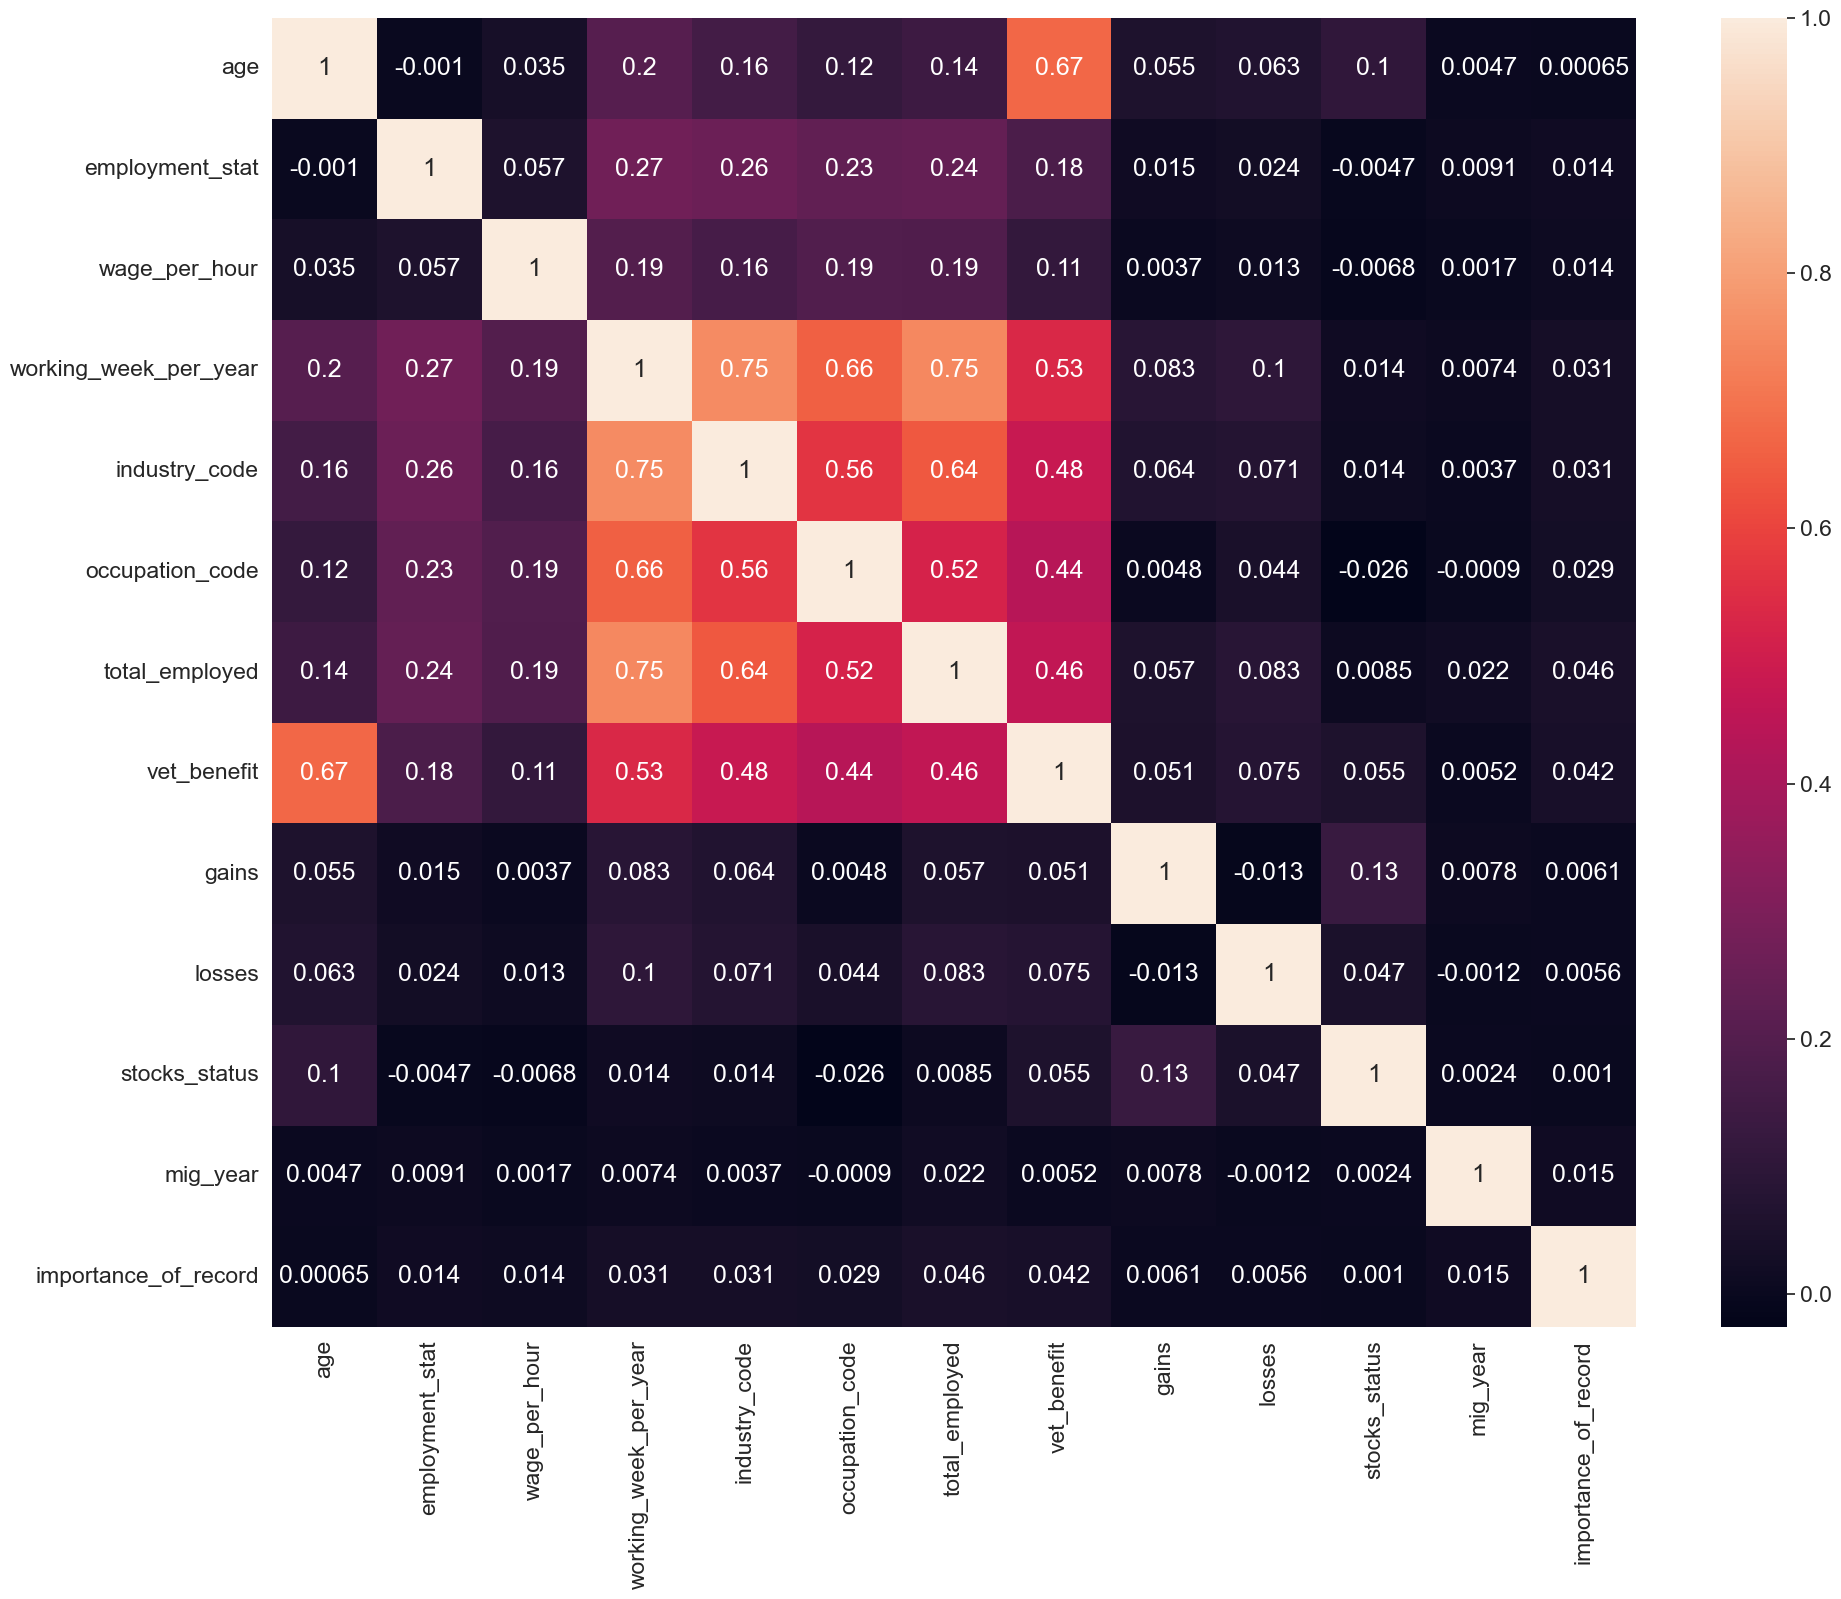

In [96]:
plt.figure(figsize=(22,17))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(), annot=True)

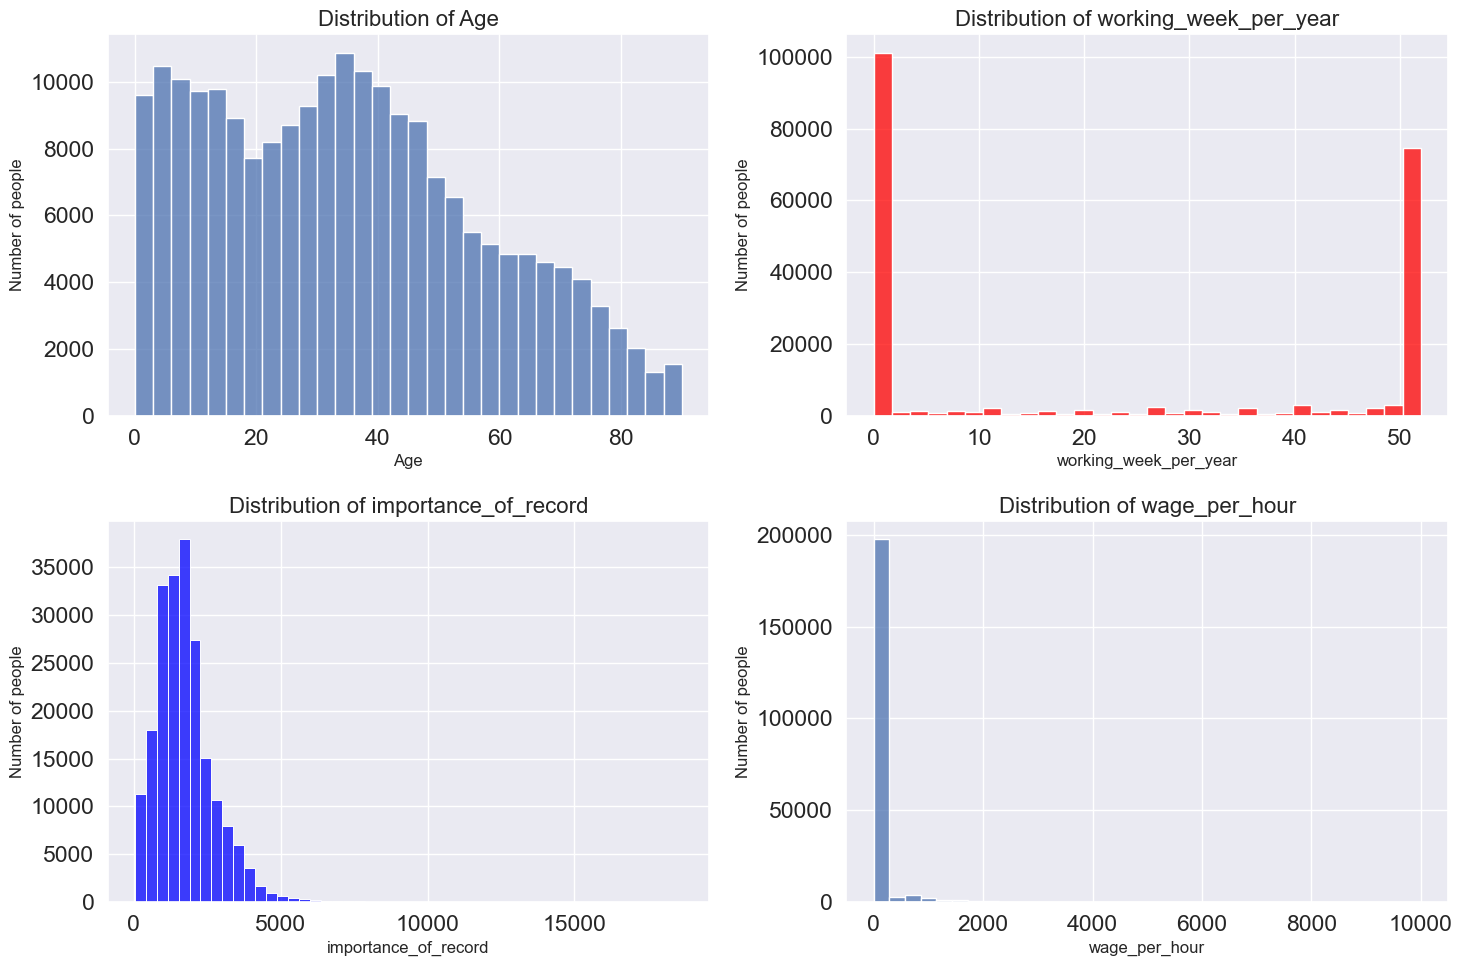

In [97]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot the distribution of Age
sns.histplot(df['age'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age', fontsize=16)
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Number of people', fontsize=12)

# Plot the distribution of working_week_per_year
sns.histplot(df['working_week_per_year'], bins=30, color='red', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of working_week_per_year', fontsize=16)
axes[0, 1].set_xlabel('working_week_per_year', fontsize=12)
axes[0, 1].set_ylabel('Number of people', fontsize=12)

# Plot the distribution of importance_of_record
sns.histplot(df['importance_of_record'], bins=50, color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of importance_of_record', fontsize=16)
axes[1, 0].set_xlabel('importance_of_record', fontsize=12)
axes[1, 0].set_ylabel('Number of people', fontsize=12)

# Plot the distribution of wage_per_hour
sns.histplot(df['wage_per_hour'], bins=35, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of wage_per_hour', fontsize=16)
axes[1, 1].set_xlabel('wage_per_hour', fontsize=12)
axes[1, 1].set_ylabel('Number of people', fontsize=12)

plt.tight_layout()
plt.show()

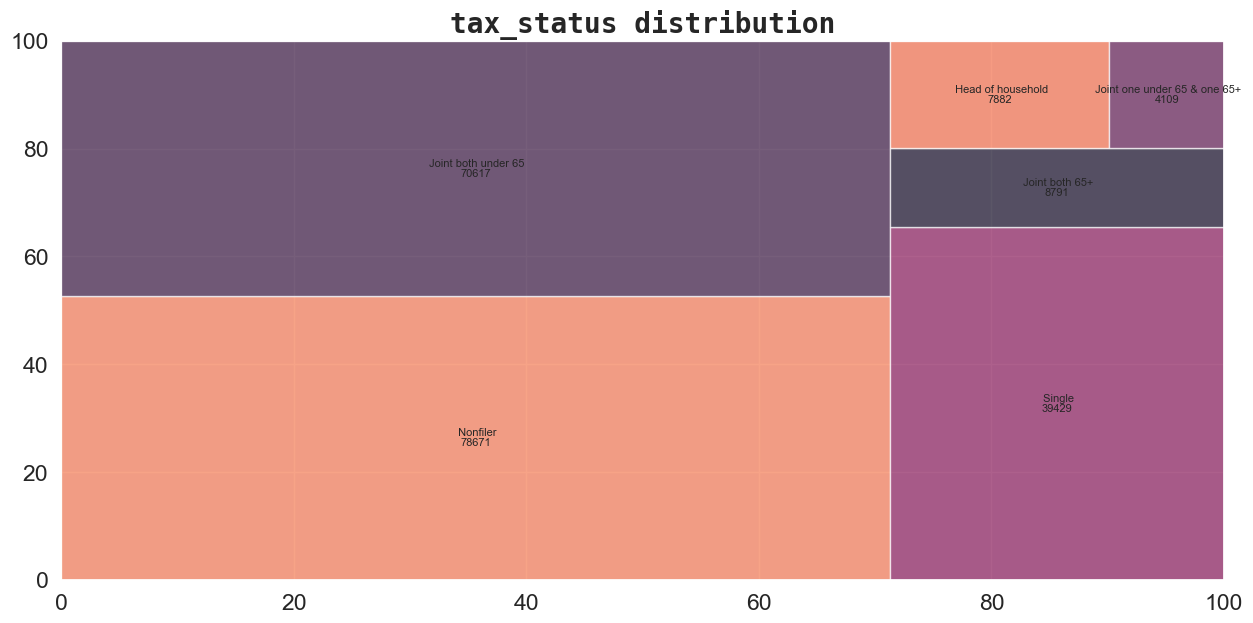

In [98]:
tax_status = df['tax_status'].value_counts()
plt.figure(figsize=(15, 7))
plt.rc('font', size=8)
squarify.plot(sizes=tax_status.values, label=tax_status.index, value=tax_status.values,alpha=0.7)
plt.title('tax_status distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

# <span style="font-family:cursive;text-align:center">⚙️ Data Preprocessing</span>

## Null value handling

In [99]:
df.replace({' ?':np.nan},inplace=True)

In [100]:
round((df.isna().sum().sort_values(ascending=False) / df.shape[0]) * 100, 2).astype(str) + "%"

veterans_admin_questionnaire      99.01%
unemployment_reason               96.89%
education_institute               93.65%
old_residence_state               92.55%
migration_prev_sunbelt             92.2%
old_residence_reg                  92.2%
is_labor_union                    90.42%
under_18_family                   72.39%
migration_code_change_in_reg      50.73%
residence_1_year_ago              50.73%
migration_code_move_within_reg    50.73%
migration_code_change_in_msa      50.73%
occupation_code_main              50.45%
class                             50.24%
country_of_birth_father            3.43%
country_of_birth_mother            3.11%
country_of_birth_own               1.75%
tax_status                          0.0%
mig_year                            0.0%
citizenship                         0.0%
stocks_status                       0.0%
losses                              0.0%
importance_of_record                0.0%
gains                               0.0%
age             

In [101]:
# removing all the columns that have null values

columns = [col for col in df.columns if df[col].isna().sum() > 0]
for col in columns:
    df = df.drop(col, axis=1)
    
print(f"We removed total {len(columns)} columns from dataset\n")

print(columns)

We removed total 17 columns from dataset

['class', 'education_institute', 'unemployment_reason', 'is_labor_union', 'occupation_code_main', 'under_18_family', 'veterans_admin_questionnaire', 'country_of_birth_own', 'country_of_birth_father', 'country_of_birth_mother', 'migration_code_change_in_msa', 'migration_prev_sunbelt', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'residence_1_year_ago', 'old_residence_reg', 'old_residence_state']


In [102]:
round((df.isna().sum().sort_values(ascending=False) / df.shape[0]) * 100, 2).astype(str) + "%"

age                      0.0%
total_employed           0.0%
importance_of_record     0.0%
mig_year                 0.0%
citizenship              0.0%
stocks_status            0.0%
losses                   0.0%
gains                    0.0%
tax_status               0.0%
vet_benefit              0.0%
household_summary        0.0%
household_stat           0.0%
occupation_code          0.0%
gender                   0.0%
industry_code_main       0.0%
industry_code            0.0%
working_week_per_year    0.0%
wage_per_hour            0.0%
employment_stat          0.0%
employment_commitment    0.0%
is_hispanic              0.0%
race                     0.0%
marital_status           0.0%
education                0.0%
income_above_limit       0.0%
dtype: object

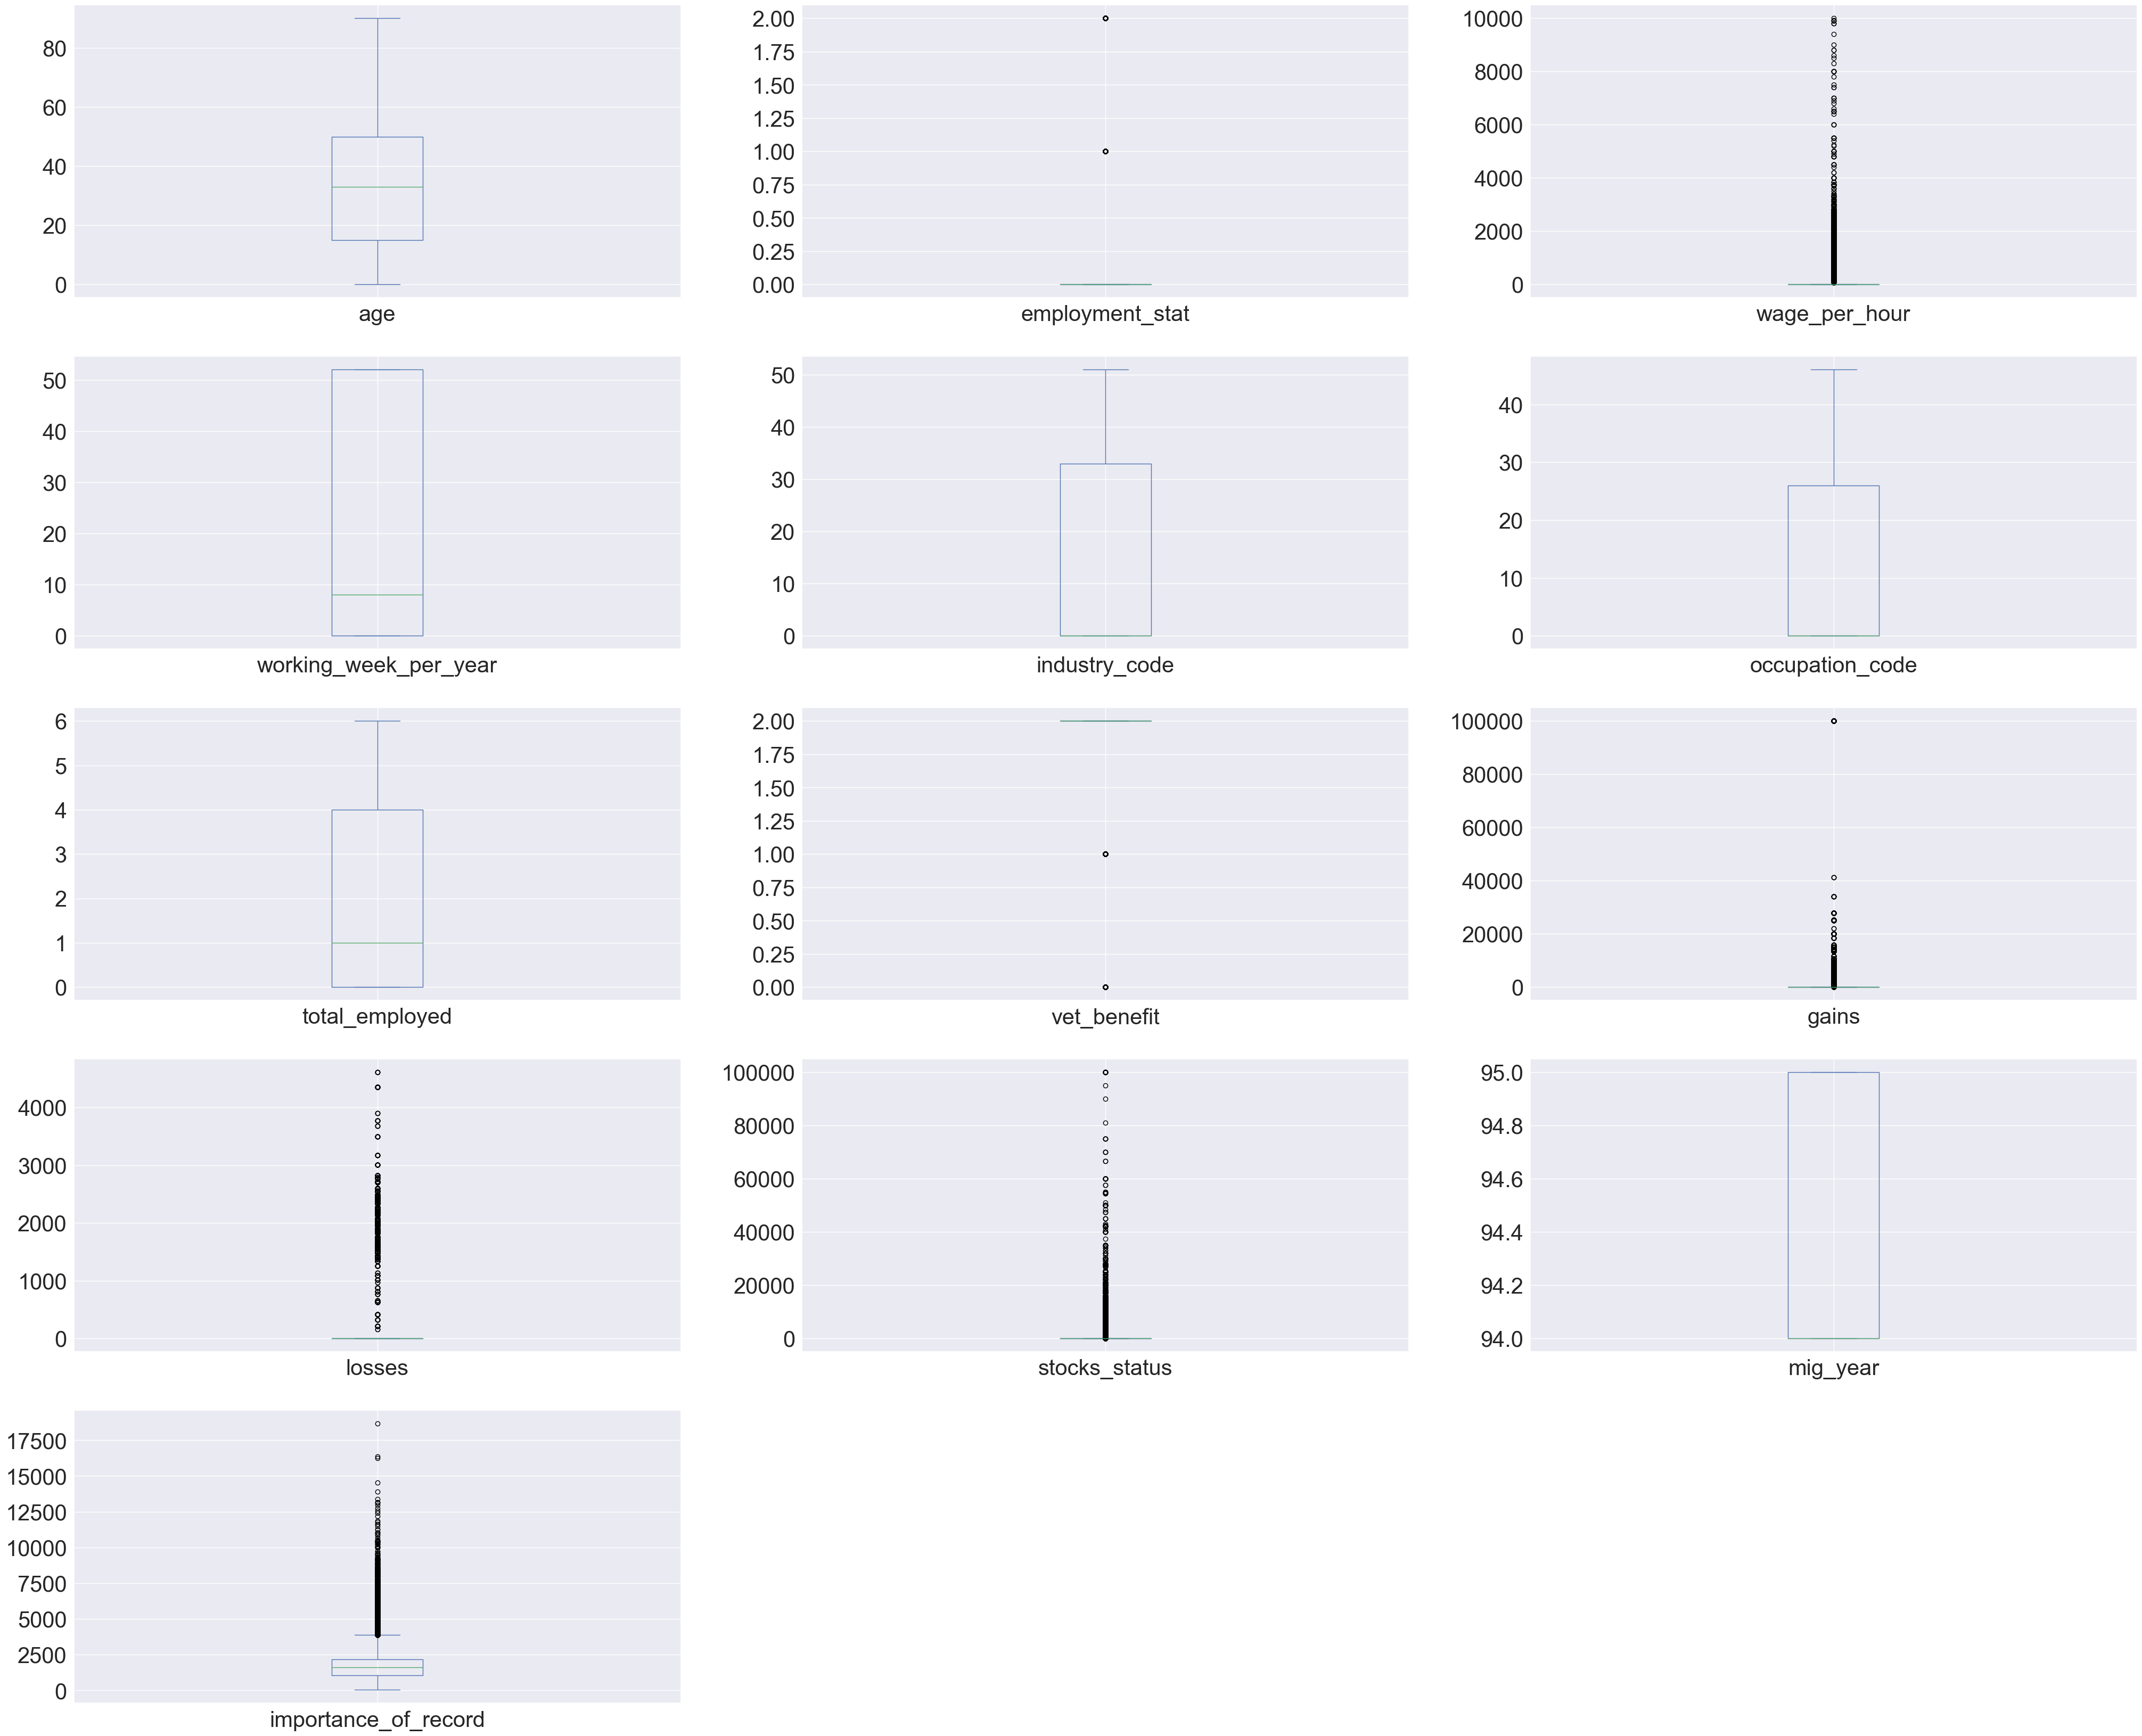

In [103]:
# finding the outlier 
df.plot(kind="box", 
                vert=True,
                subplots=True, 
                layout = (6,3), 
                figsize=(50,50), 
                sharex=False, 
                sharey=False, 
                fontsize=30);

In [104]:
for column in df.columns:
    print(f"Unique values in {column}:")
    print(df[column].unique(), "\n")

Unique values in age:
[79 65 21  2 70 45 53 22 73 30  4 16 43 36  5 88 40 47 59 69 50 27 39 85
 29 41 14 33 67 52 11  9 13 19 26 23 37 58 63 46 62 28 31  3 18 78 15 38
  7 35  1 20  0 48 24 56 25  8 66 71 32 75 51 10 44 42 55 74 77 34 80 17
 83 86 12 68 60 57 64 72 90 61 82  6 84 49 76 54 89 81 87] 

Unique values in gender:
[' Female' ' Male'] 

Unique values in education:
[' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)'] 

Unique values in marital_status:
[' Widowed' ' Never married' ' Married-civilian spouse present'
 ' Divorced' ' Married-spouse absent' ' Separated'
 ' Married-A F spous

In [105]:
df = df.drop('household_stat', axis=1)

In [106]:
df.shape

(209499, 24)

In [107]:
print("Value count of income limit:")
print(df['income_above_limit'].value_counts())
print("----------------------------------")
print(" Income limit data percentage:")
print(df['income_above_limit'].value_counts(normalize=True)*100)

Value count of income limit:
Below limit    196501
Above limit     12998
Name: income_above_limit, dtype: int64
----------------------------------
 Income limit data percentage:
Below limit    93.795674
Above limit     6.204326
Name: income_above_limit, dtype: float64


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* We can see clearly highly imbalance data have in dataset so we need to performe options to imbalance the data


### Fixing imbalanced dataset using Oversampling

In [108]:
x = df.drop('income_above_limit', axis=1)
y = df['income_above_limit']

In [109]:
print(x.shape)
print(y)

(209499, 23)
0         Below limit
1         Below limit
2         Below limit
3         Below limit
4         Below limit
             ...     
209494    Below limit
209495    Below limit
209496    Below limit
209497    Below limit
209498    Below limit
Name: income_above_limit, Length: 209499, dtype: object


In [110]:
# imbalancing the dataset 
ros = RandomOverSampler(random_state=42)
X_random_resampled, Y_random_resampled = ros.fit_resample(x,y)

In [111]:
print('The class Imbalance in the data is given below')
print(Y_random_resampled.value_counts(),'\n')
print('The class imbalance in terms of percentage is given below ')
print(f"{Y_random_resampled.value_counts(normalize=True)*100}")

The class Imbalance in the data is given below
Below limit    196501
Above limit    196501
Name: income_above_limit, dtype: int64 

The class imbalance in terms of percentage is given below 
Below limit    50.0
Above limit    50.0
Name: income_above_limit, dtype: float64


In [112]:
x_train, x_test, y_train, y_test = train_test_split(X_random_resampled, Y_random_resampled, test_size=0.2, random_state=34)

In [113]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (314401, 23)
X_test shape: (78601, 23)
Y_train shape: (314401,)
Y_test shape: (78601,)


In [114]:
x_train.reset_index(drop=True,inplace=True)
x_train.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
0,18,Male,High school graduate,Never married,White,All other,Children or Armed Forces,0,0,52,...,1,Nonrelative of householder,2,Single,0,0,0,Native,94,4196.14
1,39,Male,9th grade,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,...,0,Householder,2,Nonfiler,0,0,0,Native,95,1949.19
2,32,Male,High school graduate,Married-civilian spouse present,White,All other,Children or Armed Forces,2,0,48,...,5,Householder,2,Joint both under 65,7298,0,0,Native,94,2072.26
3,58,Female,9th grade,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,...,0,Spouse of householder,2,Joint both under 65,0,0,0,Native,95,628.27
4,29,Female,Bachelors degree(BA AB BS),Never married,White,All other,Full-time schedules,0,0,52,...,6,Child 18 or older,2,Single,0,0,2200,Native,95,1125.38


In [115]:
x_test.reset_index(drop=True,inplace=True)
x_test.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
0,14,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,0,...,0,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,2444.51
1,20,Male,11th grade,Never married,White,All other,Children or Armed Forces,2,0,42,...,6,Other relative of householder,2,Single,0,0,0,Native,94,2233.01
2,34,Female,Masters degree(MA MS MEng MEd MSW MBA),Separated,White,All other,Children or Armed Forces,2,0,40,...,4,Householder,2,Single,4787,0,0,Native,94,1988.28
3,40,Male,Doctorate degree(PhD EdD),Married-civilian spouse present,White,All other,PT for non-econ reasons usually FT,0,0,44,...,2,Householder,2,Joint both under 65,99999,0,13500,Native,95,1701.23
4,48,Female,Bachelors degree(BA AB BS),Married-civilian spouse present,White,All other,Full-time schedules,0,0,52,...,6,Spouse of householder,2,Joint both under 65,0,0,500,Native,95,2611.42


## Encoding 

In [116]:
columns_to_encode = ['gender','education','marital_status','race','is_hispanic','employment_commitment','industry_code_main',
                     'household_summary','tax_status','citizenship']

columns_to_keep = x_train.drop(columns_to_encode,axis=1).columns

encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

encoded_columns = encoder.fit_transform(x_train[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

x_train_encoded = pd.concat([encoded_df, x_train[columns_to_keep]], axis=1)

In [117]:
x_train_encoded.head()

,gender_ Female,gender_ Male,education_ 10th grade,education_ 11th grade,education_ 12th grade no diploma,education_ 1st 2nd 3rd or 4th grade,education_ 5th or 6th grade,education_ 7th and 8th grade,education_ 9th grade,education_ Associates degree-academic program,...,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52,33,29,1,2,0,0,0,94,4196.14
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,2,0,0,0,95,1949.19
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48,33,35,5,2,7298,0,0,94,2072.26
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,2,0,0,0,95,628.27
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52,45,3,6,2,0,0,2200,95,1125.38


In [118]:
x_train_encoded.shape

(314401, 105)

In [119]:
encoded_columns = encoder.transform(x_test[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

x_test_encoded = pd.concat([encoded_df, x_test[columns_to_keep]], axis=1)

x_test_encoded.head()

,gender_ Female,gender_ Male,education_ 10th grade,education_ 11th grade,education_ 12th grade no diploma,education_ 1st 2nd 3rd or 4th grade,education_ 5th or 6th grade,education_ 7th and 8th grade,education_ 9th grade,education_ Associates degree-academic program,...,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,95,2444.51
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42,0,0,6,2,0,0,0,94,2233.01
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40,45,12,4,2,4787,0,0,94,1988.28
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44,42,7,2,2,99999,0,13500,95,1701.23
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52,41,8,6,2,0,0,500,95,2611.42


In [132]:
x_test_encoded.shape

(78601, 105)

In [133]:
y_train.replace({'Below limit':0,'Above limit':1},inplace=True)
y_test.replace({'Below limit':0,'Above limit':1},inplace=True)

## <span style="font-family:cursive;text-align:center">🤖 Baseline Modelling (Encoding after splitting)</span>

## <span style="font-family:cursive;text-align:center">Random Forest Classifier 🌲🌲🌲</span>

In [130]:
model = RandomForestClassifier(random_state=34)

In [134]:
model.fit(x_train_encoded, y_train)

RandomForestClassifier(random_state=34)

In [135]:
y_prediction = model.predict(x_test_encoded)

In [136]:
print('Random Forest Classifier:')
print('F1 score:', round(f1_score(y_test, y_prediction), 2))

Random Forest Classifier:
F1 score: 0.99


In [138]:
import joblib 
joblib.dump(model, "Classifier_model.joblib")

['Classifier_model.joblib']

## Explainable AI

In [139]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 462.3/462.3 kB 705.3 kB/s eta 0:00:00


In [140]:
import shap

In [141]:
shap.initjs()

In [142]:
sample_set = x_train_encoded.sample(10)

In [144]:
explainer = shap.Explainer(model)

In [145]:
shap_values_beeswarm = explainer(sample_set,check_additivity=False)

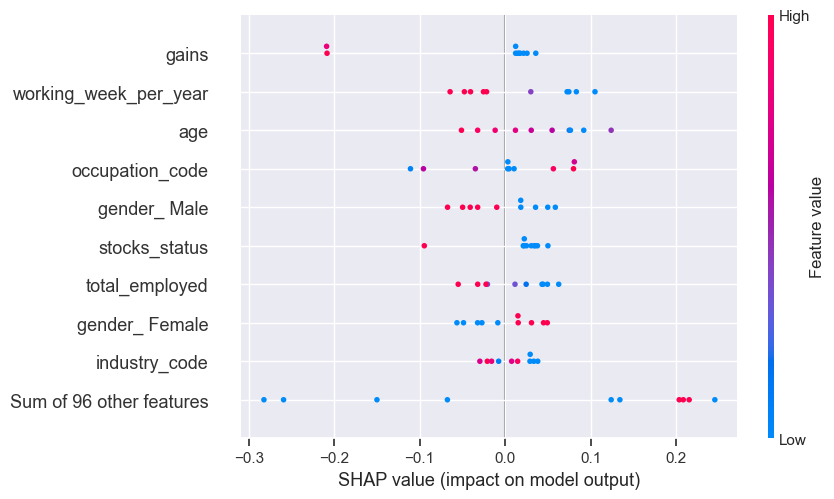

In [146]:
shap.plots.beeswarm(shap_values_beeswarm[:,:,0])

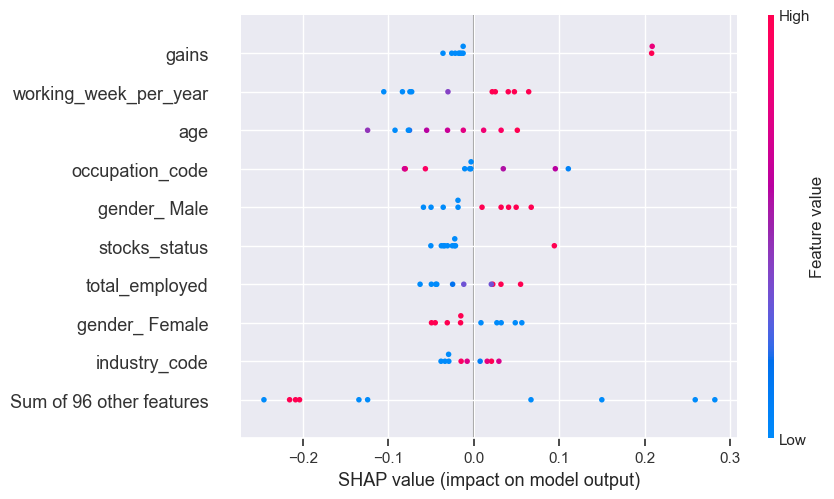

In [147]:
shap.plots.beeswarm(shap_values_beeswarm[:,:,1])

In [149]:
choosen_instance = sample_set.iloc[0,:]
shap_values_fp = explainer.shap_values(choosen_instance)

In [150]:
shap.force_plot(explainer.expected_value[1], shap_values_fp[1], choosen_instance)

In [151]:
shap.force_plot(explainer.expected_value[0], shap_values_fp[0], choosen_instance)